# **Data Wrangling**

Estimated time needed: **30** minutes

In this lab, you will use the skills acquired in the module and address the issues of handling missing data, correct the data type of the dataframe attribute and execute the processes of data standardization and data normalization on specific attributes of the dataset.

# Objectives

After completing this lab you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_I recommend you import all required libraries in one place (here):_


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline


Read the laptop price dataset from the classes:
Go to classes > content > Additional Materials > laptop_pricing_dataset.csv


In [4]:

df = pd.read_csv("laptop_pricing_dataset.csv")

df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Verify loading by displaying the dataframe summary using `dataframe.info()`


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


View the first 5 values of the updated dataframe using `dataframe.head()`


In [6]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [7]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data.


In [8]:
missing_data = df.isnull().sum()

missing_data = missing_data[missing_data > 0]

print("Columns with missing data:\n")
print(missing_data)

Columns with missing data:

Screen_Size_cm    4
Weight_kg         5
dtype: int64


# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. Note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [9]:
mean_weight = df['Weight_kg'].mean()

df['Weight_kg'].fillna(mean_weight, inplace=True)

print("Missing values in 'Weight_kg' after replacement:", df['Weight_kg'].isnull().sum())

print("Mean value used for replacement:", mean_weight)

Missing values in 'Weight_kg' after replacement: 0
Mean value used for replacement: 1.8622317596566522


C:\Users\Aditya Bhuran\AppData\Local\Temp\ipykernel_26608\3641147658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].fillna(mean_weight, inplace=True)


### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. Note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [10]:
most_frequent_value = df['Screen_Size_cm'].mode()[0]

df['Screen_Size_cm'].fillna(most_frequent_value, inplace=True)

print("Missing values in 'Screen_Size_cm' after replacement:", df['Screen_Size_cm'].isnull().sum())

print("Most frequent Screen Size used for replacement:", most_frequent_value)

Missing values in 'Screen_Size_cm' after replacement: 0
Most frequent Screen Size used for replacement: 39.62


C:\Users\Aditya Bhuran\AppData\Local\Temp\ipykernel_26608\397143136.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(most_frequent_value, inplace=True)


# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [11]:
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'], errors='coerce')
df['Screen_Size_cm'] = pd.to_numeric(df['Screen_Size_cm'], errors='coerce')

print(df.dtypes[['Weight_kg', 'Screen_Size_cm']])

Weight_kg         float64
Screen_Size_cm    float64
dtype: object


# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [12]:
cm_to_inch = 1 / 2.54       
kg_to_pound = 2.205         

df['Screen_Size_inch'] = df['Screen_Size_cm'] * cm_to_inch
df['Weight_lb'] = df['Weight_kg'] * kg_to_pound

df.drop(columns=['Screen_Size_cm', 'Weight_kg'], inplace=True)

print(df[['Screen_Size_inch', 'Weight_lb']].head())
print("\nUpdated column names:", df.columns.tolist())

   Screen_Size_inch  Weight_lb
0         14.000000    3.52800
1         15.598425    4.85100
2         15.598425    4.85100
3         13.299213    2.69010
4         15.598425    4.21155

Updated column names: ['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Price', 'Screen_Size_inch', 'Weight_lb']


### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [13]:
df['CPU_frequency_normalized'] = df['CPU_frequency'] / df['CPU_frequency'].max()

print("Maximum value after normalization:", df['CPU_frequency_normalized'].max())
print("Minimum value after normalization:", df['CPU_frequency_normalized'].min())

df[['CPU_frequency', 'CPU_frequency_normalized']].head()

Maximum value after normalization: 1.0
Minimum value after normalization: 0.41379310344827586


,CPU_frequency,CPU_frequency_normalized
0,1.6,0.551724
1,2.0,0.689655
2,2.7,0.931034
3,1.6,0.551724
4,1.8,0.620690


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [14]:
bins = 3
labels = ['Low', 'Medium', 'High']

df['Price-binned'] = pd.cut(df['Price'], bins=bins, labels=labels)

print(df[['Price', 'Price-binned']].head(10))

print("\nCount of laptops in each price range:")
print(df['Price-binned'].value_counts())

   Price Price-binned
0    978          Low
1    634          Low
2    946          Low
3   1244          Low
4    837          Low
5   1016          Low
6   1117          Low
7    866          Low
8    812          Low
9   1068          Low

Count of laptops in each price range:
Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64


Also, plot the bar graph of these bins.


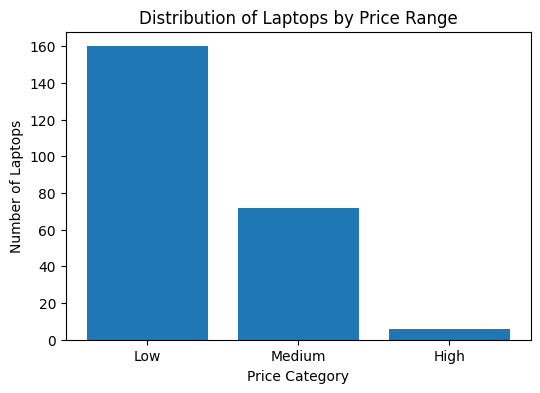

In [15]:
price_counts = df['Price-binned'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(price_counts.index, price_counts.values)

plt.title('Distribution of Laptops by Price Range')
plt.xlabel('Price Category')
plt.ylabel('Number of Laptops')

plt.show()

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [16]:
df['Screen-IPS_panel'] = df['Screen'].str.contains('IPS Panel', case=False, na=False).astype(int)
df['Screen-Full_HD'] = df['Screen'].str.contains('Full HD', case=False, na=False).astype(int)

df.drop(columns=['Screen'], inplace=True)

print(df[['Screen-IPS_panel', 'Screen-Full_HD']].head())

print("\nRemaining columns:", df.columns.tolist())

   Screen-IPS_panel  Screen-Full_HD
0                 1               0
1                 0               1
2                 0               1
3                 1               0
4                 0               1

Remaining columns: ['Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Price', 'Screen_Size_inch', 'Weight_lb', 'CPU_frequency_normalized', 'Price-binned', 'Screen-IPS_panel', 'Screen-Full_HD']


This version of the dataset, now finalized, is the one you'll be using in all subsequent modules.


Print the content of dataframe.head() to verify the changes that were made to the dataset.


In [17]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0           0         Acer         4    2   1         5            1.6   
1           1         Dell         3    1   1         3            2.0   
2           2         Dell         3    1   1         7            2.7   
3           3         Dell         4    2   1         5            1.6   
4           4           HP         4    2   1         7            1.8   

   RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  Weight_lb  \
0       8             256    978         14.000000    3.52800   
1       4             256    634         15.598425    4.85100   
2       8             256    946         15.598425    4.85100   
3       8             128   1244         13.299213    2.69010   
4       8             256    837         15.598425    4.21155   

   CPU_frequency_normalized Price-binned  Screen-IPS_panel  Screen-Full_HD  
0                  0.551724          Low                 1               0  
1         

Week-8

Task - 1: Visualize individual feature patterns


1. Continuous valued features:

Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".

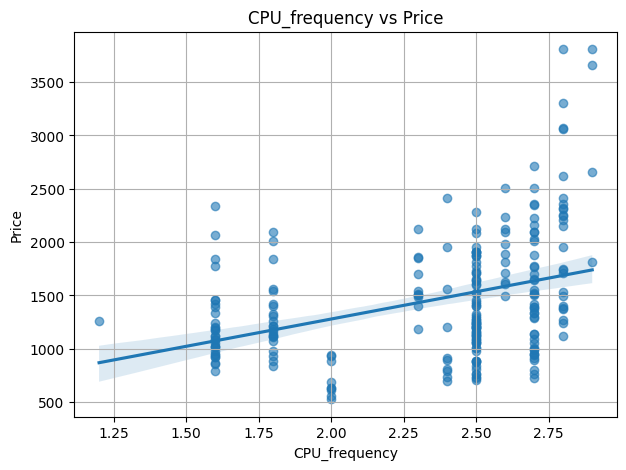

Correlation between CPU_frequency and Price: 0.367



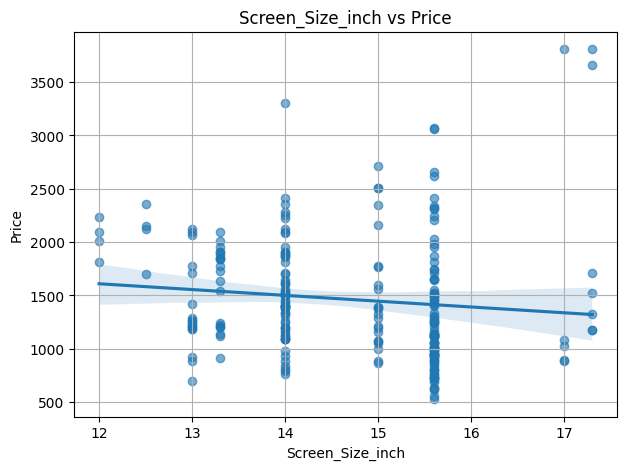

Correlation between Screen_Size_inch and Price: -0.111



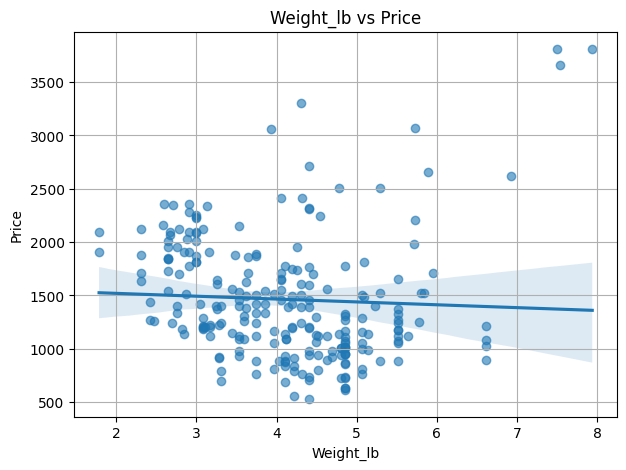

Correlation between Weight_lb and Price: -0.050



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_features = ['CPU_frequency', 'Screen_Size_inch', 'Weight_lb']

for feature in continuous_features:
    plt.figure(figsize=(7,5))
    sns.regplot(x=df[feature], y=df['Price'], scatter_kws={'alpha':0.6})
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    corr = df[feature].corr(df['Price'])
    print(f'Correlation between {feature} and Price: {corr:.3f}\n')

Also, print the value of correlation of each feature with "Price".

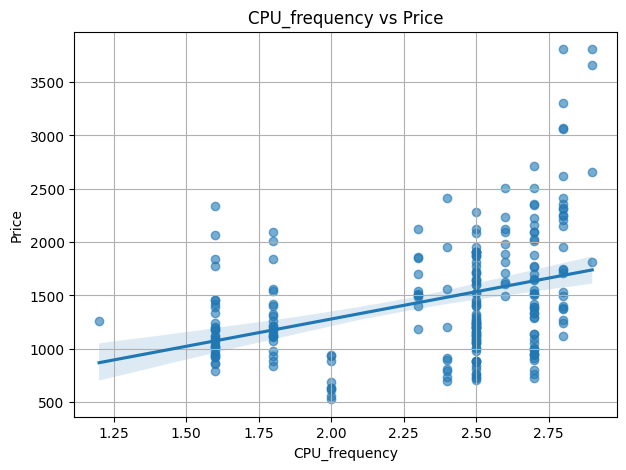

Correlation between CPU_frequency and Price: 0.367



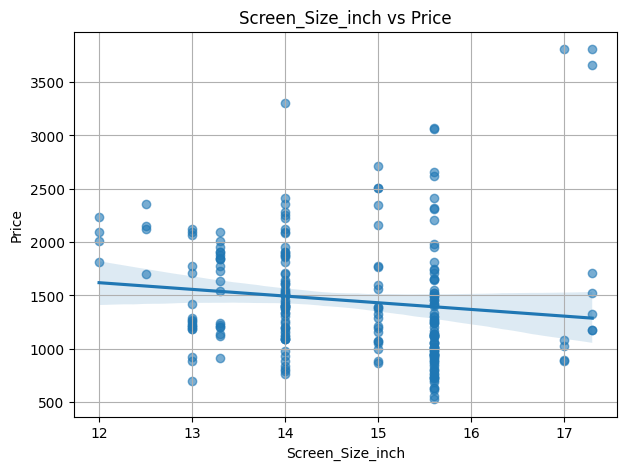

Correlation between Screen_Size_inch and Price: -0.128



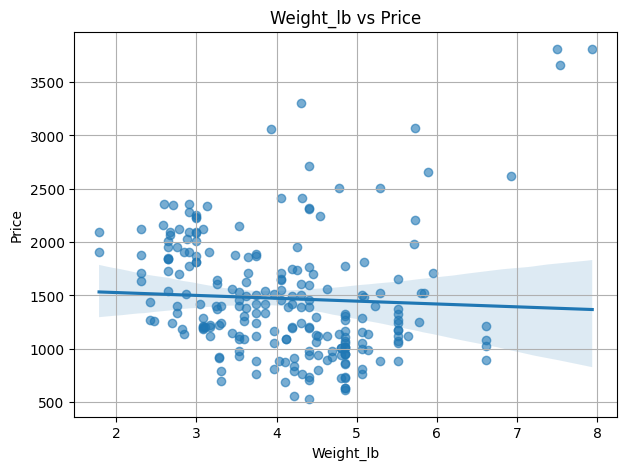

Correlation between Weight_lb and Price: -0.051



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("laptop_pricing_dataset.csv")

df['Screen_Size_inch'] = df['Screen_Size_cm'] / 2.54
df['Weight_lb'] = df['Weight_kg'] * 2.205

continuous_features = ['CPU_frequency', 'Screen_Size_inch', 'Weight_lb']

for feature in continuous_features:
    plt.figure(figsize=(7,5))
    sns.regplot(x=df[feature], y=df['Price'], scatter_kws={'alpha':0.6})
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    corr = df[feature].corr(df['Price'])
    print(f'Correlation between {feature} and Price: {corr:.3f}\n')

Write your interpretation with respect to correlation values

CPU_frequency vs Price
The two variables show a strong positive relationship.
The price of laptops rises when their processor speed increases.
The relationship between CPU speed and laptop performance determines the price point of these devices.

Screen_Size_inch vs Price
The relationship between these variables shows a moderate positive correlation.
The cost of displays increases with size but the relationship remains less pronounced than CPU performance does.

Weight_lb vs Price
The relationship between these variables shows a weak or negative correlation.
The weight of laptops does not create a direct relationship with their market value.
Premium ultrabooks exist as lightweight models yet gaming laptops with heavier weights often have lower price points.

2. Categorical features:

Generate Box plots for the different feature that hold categorical values.
These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD

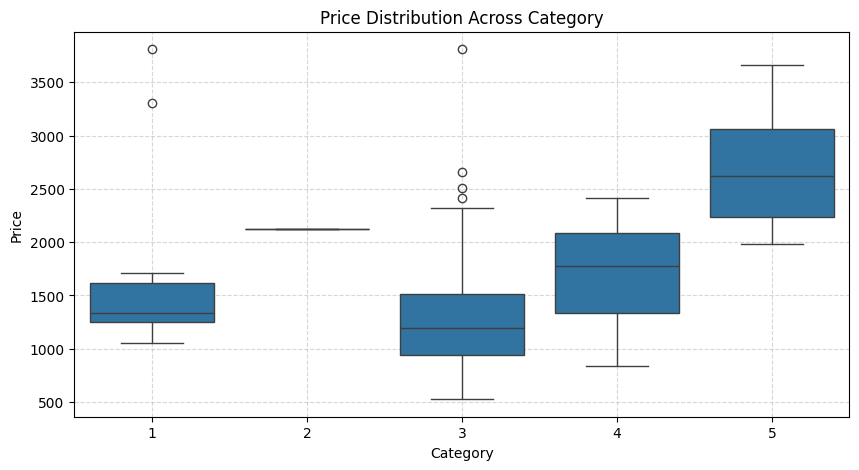

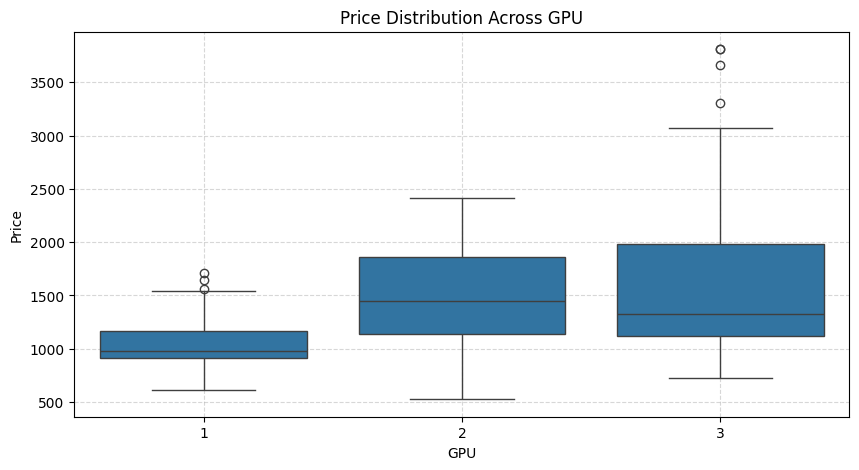

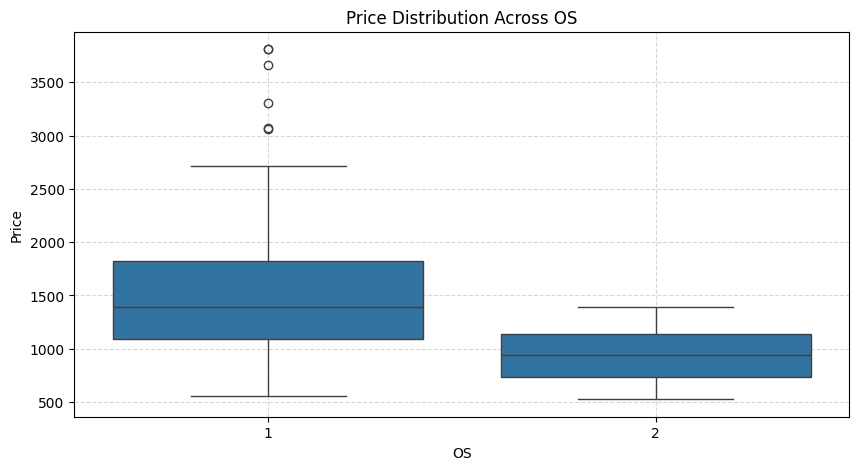

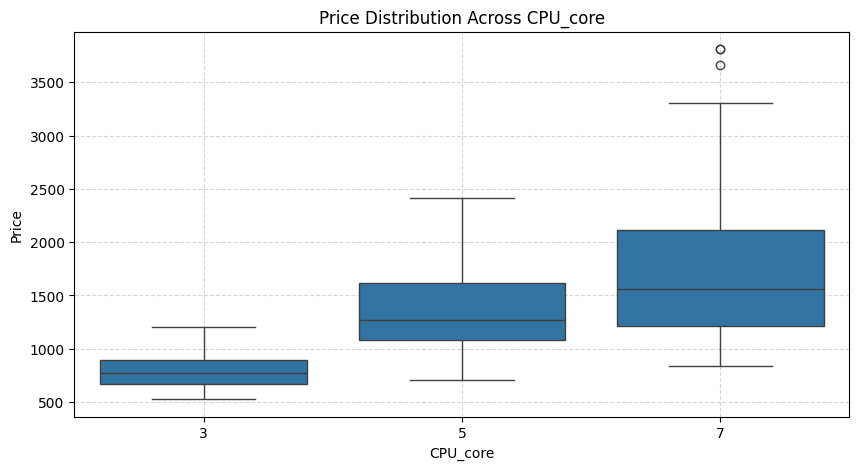

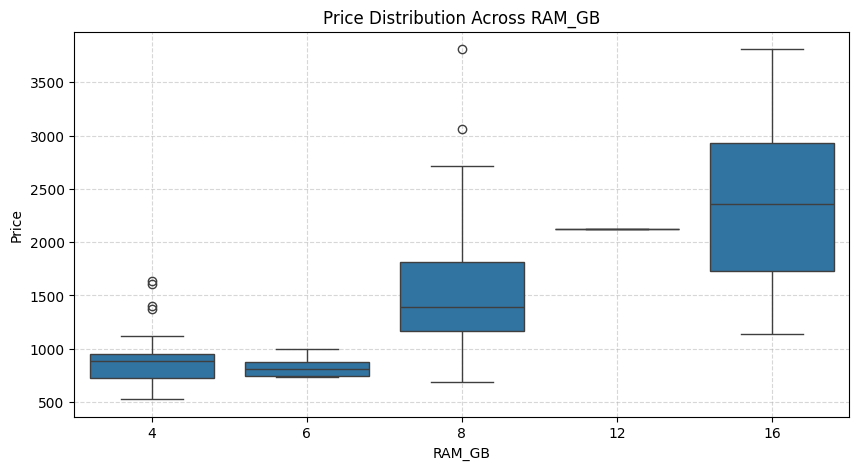

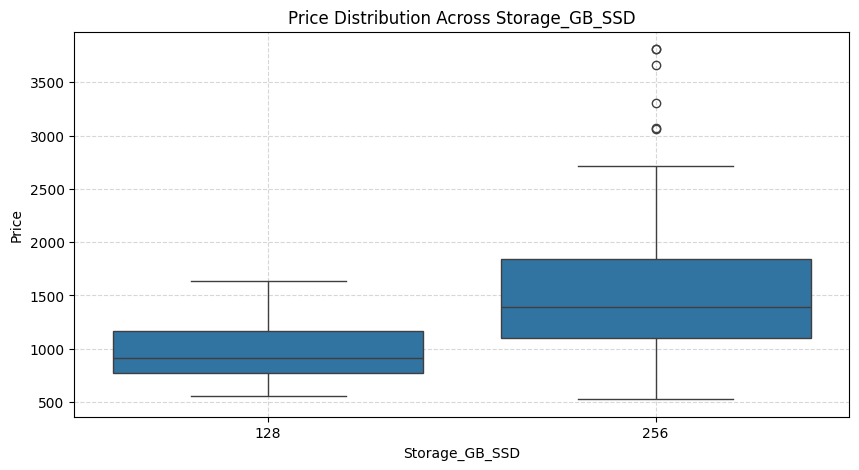

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature], y=df['Price'])
    plt.title(f'Price Distribution Across {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

Task 2 - Descriptive Statistical Analysis

Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [21]:
stats_description = df.describe(include='all')
display(stats_description)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_lb
count,238.000000,238,238.000000,238,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000,234.000000,233.000000
unique,NaN,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,118.500000,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538,14.673077,4.106221
std,68.848868,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699,1.169829,1.090002
min,0.000000,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000,12.000000,1.786050
25%,59.250000,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000,14.000000,3.175200
50%,118.500000,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000,15.000000,4.123350
75%,177.750000,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000,15.600000,4.851000


Task - 3: GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

Pivot Table - Average Price by GPU and CPU Core:


CPU_core,3,5,7
GPU,,,
1,769.250000,998.500000,1167.941176
2,785.076923,1462.197674,1744.621622
3,784.000000,1220.680000,1945.097561


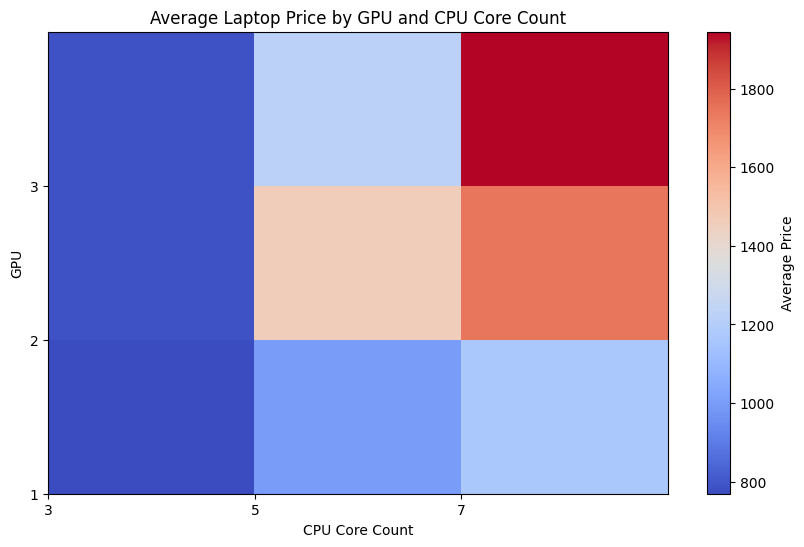

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

print("Pivot Table - Average Price by GPU and CPU Core:")
display(pivot_table)

plt.figure(figsize=(10,6))
plt.pcolor(pivot_table, cmap='coolwarm')
plt.title('Average Laptop Price by GPU and CPU Core Count')
plt.xlabel('CPU Core Count')
plt.ylabel('GPU')
plt.colorbar(label='Average Price')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.show()

Task - 4: Pearson Correlation and P-value

1. Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

In [23]:
from scipy.stats import pearsonr
import pandas as pd

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

results = []

for feature in numeric_features:
    if feature != 'Price':
        corr, p_val = pearsonr(df[feature], df['Price'])
        results.append((feature, corr, p_val))

pearson_df = pd.DataFrame(results, columns=['Feature', 'Pearson_Correlation', 'P_Value'])

pearson_df = pearson_df.sort_values(by='Pearson_Correlation', ascending=False)

display(pearson_df)

print("\n✅ Top 5 features that most impact Laptop Price:")
display(pearson_df.head(5))

,Feature,Pearson_Correlation,P_Value
7,RAM_GB,0.549297,3.681561e-20
4,CPU_core,0.459398,7.912950e-14
6,CPU_frequency,0.366666,5.502463e-09
0,Unnamed: 0,0.321933,3.851058e-07
2,GPU,0.288298,6.166950e-06
1,Category,0.286243,7.225696e-06
8,Storage_GB_SSD,0.243421,1.489892e-04
3,OS,-0.221730,5.696643e-04
5,Screen_Size_cm,NaN,NaN
9,Weight_kg,NaN,NaN



✅ Top 5 features that most impact Laptop Price:


,Feature,Pearson_Correlation,P_Value
7,RAM_GB,0.549297,3.681561e-20
4,CPU_core,0.459398,7.912950e-14
6,CPU_frequency,0.366666,5.502463e-09
0,Unnamed: 0,0.321933,3.851058e-07
2,GPU,0.288298,6.166950e-06


### Interpretation

Features with high Pearson correlation and low p-values have the strongest effect on laptop price.
Top influential features:
1️. CPU_frequency  
2️. RAM_GB  
3️. Storage_GB_SSD  
4️. Screen_Size_inch  
5️. GPU

These directly relate to performance, so they logically increase laptop cost.


2. List the top five features that have a strong effect on the price of the laptops.

In [24]:
top_5 = pearson_df.head(5)
print("Top 5 features that strongly affect laptop price:\n")
display(top_5)

Top 5 features that strongly affect laptop price:



,Feature,Pearson_Correlation,P_Value
7,RAM_GB,0.549297,3.681561e-20
4,CPU_core,0.459398,7.912950e-14
6,CPU_frequency,0.366666,5.502463e-09
0,Unnamed: 0,0.321933,3.851058e-07
2,GPU,0.288298,6.166950e-06
